In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import zipfile
import pandas as pd
 
# read the dataset using the compression zip
df = pd.read_csv("C:/Users/dell/Downloads/train_small.csv.zip",compression='zip')

In [3]:
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [4]:
df.shape

(2380557, 54)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [6]:
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [7]:
len(df['user_hist_stars'].value_counts())  #  292 is the length of column in which null value contain of 95%

292

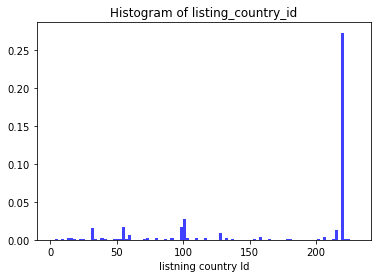

In [8]:

n, bins, patches = plt.hist(df.listing_country_id, 100, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('listning country Id')
plt.title('Histogram of listing_country_id')
plt.show()

In [9]:
# It shows that the 219 number country has largest obervation
#The largest country has 61% of all observations.
df.groupby('listing_country_id').size().nlargest(5)


listing_country_id
219    1453640
100     147465
55       88802
31       76562
99       65434
dtype: int64

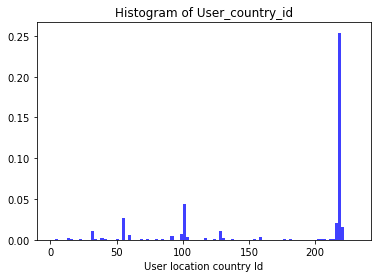

In [10]:
n, bins, patches = plt.hist(df.user_country_id, 100, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('User location country Id')
plt.title('Histogram of User_country_id')
plt.show()

In [11]:
#The data is anonymized, so determining the exact country or city to which a consumer plans to travel to is not possible.
#Out of those 61% , 58% of searches are made by consumers also located in this country

df.groupby('user_country_id').size().nlargest(5)

user_country_id
219    1390167
100     237213
55      140462
216     104127
220      84940
dtype: int64

In [12]:
df['listing_review_score'].value_counts()/len(df)

4.0    0.313996
4.5    0.312439
3.5    0.154593
3.0    0.075758
5.0    0.047908
0.0    0.046955
2.5    0.028893
2.0    0.012345
1.5    0.002920
1.0    0.002728
Name: listing_review_score, dtype: float64

In [13]:
#Therefore, to improve the computational efficiency, we are going to train independent models on 219 country id visitors . 
#This method greatly reduces time on training.

id_219 = df.loc[df['user_country_id'] == 219]
id_219 = id_219.sample(frac=0.8, random_state=99)
del id_219['user_country_id']

# we randomly take 80% of the id_219 data set. Then remove the column “user_country_id”.


In [14]:
id_219.shape

(1112134, 53)

In [15]:
print(len(id_219['listing_review_score'].value_counts()))
print(len(id_219['user_hist_paid'].value_counts()))
print(len(id_219['user_hist_stars'].value_counts()))
print(len(id_219['location_score2'].value_counts()))


10
2004
247
8368


In [16]:
print(len(id_219['search_id'].value_counts()))     # As we see that the length of unique value of this columns is very high
print(len(id_219['timestamp'].value_counts()))     # so we can drop this columns
print(len(id_219['listing_id'].value_counts()))

54836
54746
73278


In [17]:
id_219.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_hist_stars                   1066709
user_hist_paid                    1066421
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 1017
is_brand                                0
location_score1                         0
location_score2                    259624
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                        0
log_click_proportion              

In [18]:
# As we can see, we have a lot of missing data in many features. 
# We are going to drop features that have more than 90% of NaN values.


In [19]:
col_drop = ['timestamp','user_hist_stars','user_hist_paid','log_click_proportion','competitor1_rate','competitor2_rate','competitor3_rate',
            'competitor4_rate','competitor5_rate','competitor6_rate','competitor7_rate','competitor8_rate',
            'competitor1_has_availability','competitor2_has_availability','competitor3_has_availability','competitor4_has_availability','competitor5_has_availability','competitor6_has_availability','competitor7_has_availability','competitor8_has_availability',
            'competitor1_price_percent_diff','competitor2_price_percent_diff','competitor3_price_percent_diff','competitor4_price_percent_diff','competitor5_price_percent_diff','competitor6_price_percent_diff','competitor7_price_percent_diff','competitor8_price_percent_diff',
             'booking_value']

id_219.drop(col_drop,axis=1,inplace=True)

In [20]:
id_219.isnull().sum()

search_id                    0
site_id                      0
listing_country_id           0
listing_id                   0
listing_stars                0
listing_review_score      1017
is_brand                     0
location_score1              0
location_score2         259624
log_historical_price         0
listing_position             0
price_usd                    0
has_promotion                0
destination_id               0
length_of_stay               0
booking_window               0
num_adults                   0
num_kids                     0
num_rooms                    0
stay_on_saturday             0
distance_to_dest        138376
random_sort                  0
clicked                      0
booked                       0
dtype: int64

In [21]:
id_219.head()

,search_id,site_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,...,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked
30437,8534,5,219,57790,4,4.5,1,3.61,0.4602,5.50,...,4,28,1,0,1,0,1420.81,0,0,0
1393305,391260,5,154,126556,5,4.5,1,4.39,0.1173,5.16,...,4,9,1,0,1,0,5213.04,0,0,0
1478107,415131,5,100,18004,3,4.5,1,2.56,NaN,0.00,...,1,60,4,0,1,0,1641.07,0,0,0
1257928,352562,5,219,107306,3,3.5,1,1.95,NaN,4.60,...,1,1,1,1,1,1,160.09,1,0,0
1229730,344449,5,219,36458,4,4.5,1,2.89,0.1191,6.08,...,2,14,2,0,1,0,18.84,0,0,0


# location_score2, mean imputation

In [22]:
id_219['location_score2'].mean()

0.12402564439123788

In [23]:
id_219['location_score2'].fillna((id_219['location_score2'].mean()), inplace=True)

# listing_review_score , mean imputation

In [24]:
id_219['listing_review_score'].mean()

3.854465821331147

In [25]:
id_219['listing_review_score'].fillna((id_219['listing_review_score'].mean()), inplace=True)

# distance_to_dest, Impute with median

In [26]:
id_219['distance_to_dest'].median()

341.59

In [27]:
id_219['distance_to_dest'].fillna((id_219['distance_to_dest'].median()), inplace=True)

In [28]:
id_219.isnull().sum()

search_id               0
site_id                 0
listing_country_id      0
listing_id              0
listing_stars           0
listing_review_score    0
is_brand                0
location_score1         0
location_score2         0
log_historical_price    0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
clicked                 0
booked                  0
dtype: int64

In [29]:
id_219.shape
# After basic data cleaning, our id_219 country data set contains over 1112135 observations and 25 features.

(1112134, 24)

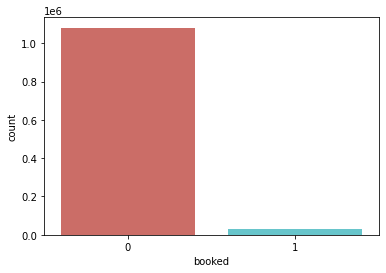

0    0.971862
1    0.028138
Name: booked, dtype: float64


In [30]:

sns.countplot(x='booked',data=id_219, palette='hls')
plt.show()

print(id_219['booked'].value_counts()/len(id_219))

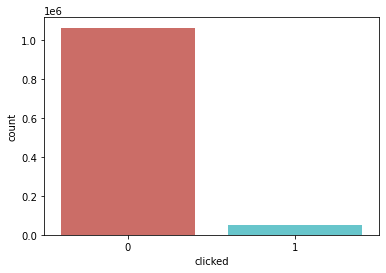

0    0.956896
1    0.043104
Name: clicked, dtype: float64


In [31]:
sns.countplot(x='clicked',data=id_219, palette='hls')
plt.show()

print(id_219['clicked'].value_counts()/len(id_219))

In [32]:
# Both booking rate(2.8%) and click through rate (4.3%) are extremely low. So, the class are very imbalanced.

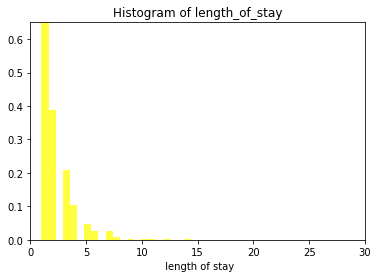

In [33]:
n, bins, patches = plt.hist(id_219.length_of_stay, 50, density = 1, facecolor='yellow', alpha=0.75)
plt.xlabel(' length of stay')
plt.title('Histogram of length_of_stay')    # No outlier found
plt.axis([0, 30, 0, 0.65])
plt.show()

In [34]:
id_219.groupby('length_of_stay').size().nlargest(5)

length_of_stay
1    527216
2    276374
3    148701
4     73941
5     33996
dtype: int64

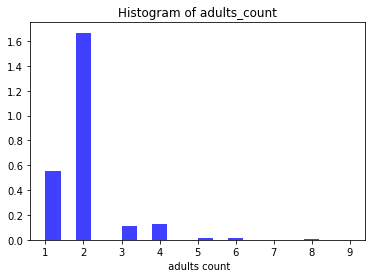

In [35]:
# Search adult counts
n, bins, patches = plt.hist(id_219.num_adults, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel(' adults count')                   
plt.title('Histogram of adults_count')               # The most common search adults count is 2-adults
plt.show()


In [36]:
id_219.groupby('num_adults').size().nlargest(5)

num_adults
2    741853
1    247593
4     56087
3     49731
6      7164
dtype: int64

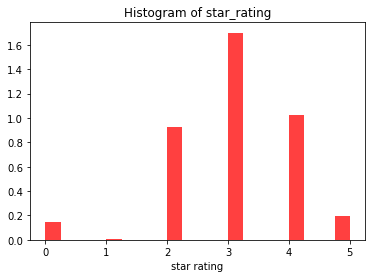

In [37]:
n, bins, patches = plt.hist(id_219.listing_stars, 20, density = 1, facecolor='red', alpha=0.75)
plt.xlabel('star rating')
plt.title('Histogram of star_rating')       # The most common property star rating is 3 stars. 
plt.show()

In [38]:
print(id_219.groupby('is_brand').size())
print(id_219.groupby('is_brand').size()/len(id_219))   # More than 73% of the properties are brand properties

is_brand
0    295572
1    816562
dtype: int64
is_brand
0    0.26577
1    0.73423
dtype: float64


In [39]:
print(id_219.groupby('stay_on_saturday').size())
print(id_219.groupby('stay_on_saturday').size()/len(id_219))  # Around 54% of searches contain staying at Saturday.

stay_on_saturday
0    512451
1    599683
dtype: int64
stay_on_saturday
0    0.460782
1    0.539218
dtype: float64


In [ ]:
# Box Plot
id_219.plot(kind='box', figsize=(12,12), layout=(5,5), sharex=False, subplots=True)

In [ ]:
from dataprep.eda import plot
plot(id_219)

(0.0, 200.0)

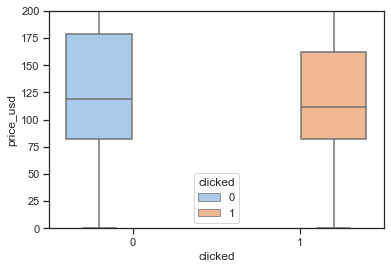

In [40]:
sns.set(style="ticks", palette="pastel")

ax = sns.boxplot(x="clicked", y="price_usd", hue="clicked", data=id_219)
ax.set_ylim([0, 200])

In [41]:
id_219.groupby('clicked')['price_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
clicked,,,,,,,,
0,1064197.0,163.202650,1822.917831,0.04,82.0,119.0,179.0,722556.0
1,47937.0,145.275046,1010.029371,0.09,82.0,112.0,162.0,172761.0


(0.0, 200.0)

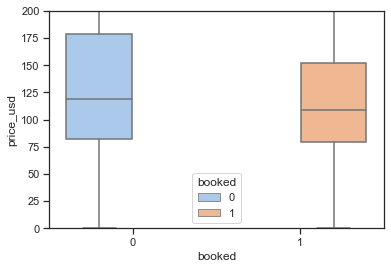

In [42]:
ax = sns.boxplot(x="booked", y="price_usd", hue="booked", data=id_219)
ax.set_ylim([0, 200])

In [43]:
id_219.groupby('booked')['price_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
booked,,,,,,,,
0,1080841.0,163.091495,1808.953531,0.04,82.0,119.0,179.0,722556.0
1,31293.0,139.578987,1243.778466,0.09,79.0,109.0,152.0,172761.0


In [44]:
# On average, the price_usd that received a click or booking is always lower than those of did not get a click or booking.

Text(0.5, 1.0, 'Correlation between different fearures')

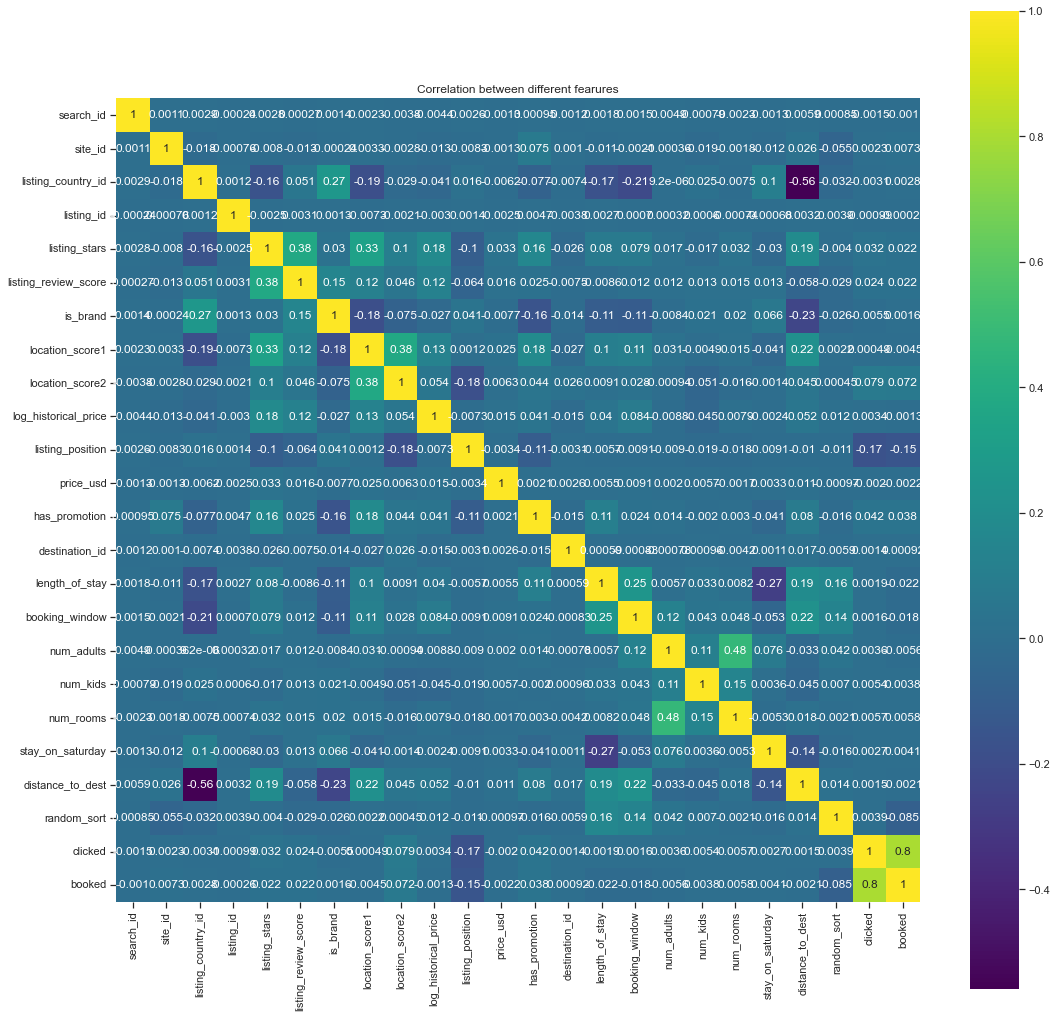

In [45]:
correlation = id_219.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

# Finding the Skewness  
# Detecting and Replacing the Outlier with Median

In [46]:
print('Skewness of price_usd:',id_219['price_usd'].skew())
print('Skewness of num_rooms:',id_219['num_rooms'].skew())
print('Skewness of num_kids:',id_219['num_kids'].skew())
print('Skewness of num_adults:',id_219['num_adults'].skew())
print('Skewness of length_of_stay:',id_219['length_of_stay'].skew())
print('Skewness of listing_stars:',id_219['listing_stars'].skew())
print('Skewness of listing_review_score:',id_219['listing_review_score'].skew())
print('Skewness of log_historical_price :',id_219['log_historical_price'].skew())
print('Skewness of stay_on_saturday:',id_219['stay_on_saturday'].skew())
print('Skewness of distance_to_dest:',id_219['distance_to_dest'].skew())

Skewness of price_usd: 185.5401429096586
Skewness of num_rooms: 6.503532704901748
Skewness of num_kids: 2.4251334443926855
Skewness of num_adults: 2.355174246158279
Skewness of length_of_stay: 3.9370934306722982
Skewness of listing_stars: -0.5898795610759789
Skewness of listing_review_score: -2.239995646215954
Skewness of log_historical_price : -1.7213721130338926
Skewness of stay_on_saturday: -0.1573581982791615
Skewness of distance_to_dest: 2.8519688737780813


In [47]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(id_219column):
#Calculate Q1, Q3 and IQR
 Q1 = id_219column.quantile(0.25)
 Q3 = id_219column.quantile(0.75)
 IQR = Q3-Q1                 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',id_219column.skew())
 print(id_219column.describe())
 id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()
 print('After replacing outliers by median:')
 print('Skewness:',id_219column.skew())
 print('Median:',id_219column.median())
 print('Mean:',id_219column.mean())
 print('Mode:',id_219column.mode())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return 

In [48]:
detection_outlier(id_219['num_adults'])

Before data preprocessing:
Skewness: 2.355174246158279
count    1.112134e+06
mean     1.983950e+00
std      8.551632e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: num_adults, dtype: float64
After replacing outliers by median:
Skewness: 0
Median: 2.0
Mean: 2.0
Mode: 0    2
Name: num_adults, dtype: int64
IQR value: 0.0
Lower,Higher: 2.0 , 2.0


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


In [49]:
detection_outlier(id_219['num_rooms'])



Before data preprocessing:
Skewness: 6.503532704901748


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


count    1.112134e+06
mean     1.097124e+00
std      3.909036e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.000000e+00
Name: num_rooms, dtype: float64
After replacing outliers by median:
Skewness: 0
Median: 1.0
Mean: 1.0
Mode: 0    1
Name: num_rooms, dtype: int64
IQR value: 0.0
Lower,Higher: 1.0 , 1.0


In [50]:
detection_outlier(id_219['num_kids'])

Before data preprocessing:
Skewness: 2.4251334443926855
count    1.112134e+06
mean     3.656232e-01
std      7.649104e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: num_kids, dtype: float64
After replacing outliers by median:
Skewness: 0
Median: 0.0
Mean: 0.0
Mode: 0    0
Name: num_kids, dtype: int64
IQR value: 0.0
Lower,Higher: 0.0 , 0.0


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


In [51]:
detection_outlier(id_219['length_of_stay'])

Before data preprocessing:
Skewness: 3.9370934306722982
count    1.112134e+06
mean     2.154802e+00
std      1.774211e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.300000e+01
Name: length_of_stay, dtype: float64
After replacing outliers by median:
Skewness: 1.1674166841517533
Median: 2.0
Mean: 1.8843259894940718
Mode: 0    1
Name: length_of_stay, dtype: int64
IQR value: 2.0
Lower,Higher: -1.0 , 5.0


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


In [52]:
detection_outlier(id_219['listing_review_score'])

Before data preprocessing:
Skewness: -2.239995646215954
count    1.112134e+06
mean     3.854466e+00
std      8.983785e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: listing_review_score, dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


After replacing outliers by median:
Skewness: -0.6826828805912986
Median: 4.0
Mean: 3.9991017195232614
Mode: 0    4.0
Name: listing_review_score, dtype: float64
IQR value: 1.0
Lower,Higher: 2.5 , 5.5


In [53]:
detection_outlier(id_219['log_historical_price'])

Before data preprocessing:
Skewness: -1.7213721130338926
count    1.112134e+06
mean     4.270248e+00
std      1.826668e+00
min      0.000000e+00
25%      4.390000e+00
50%      4.860000e+00
75%      5.260000e+00
max      6.210000e+00
Name: log_historical_price, dtype: float64
After replacing outliers by median:
Skewness: 0.27796965606928087
Median: 4.86
Mean: 4.952759478631256
Mode: 0    4.86
Name: log_historical_price, dtype: float64
IQR value: 0.8700000000000001
Lower,Higher: 3.5199999999999996 , 6.13


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


In [54]:
detection_outlier(id_219['distance_to_dest'])

Before data preprocessing:
Skewness: 2.8519688737780813
count    1.112134e+06
mean     9.434867e+02
std      1.514815e+03
min      1.000000e-02
25%      1.515600e+02
50%      3.415900e+02
75%      9.870400e+02
max      1.140753e+04
Name: distance_to_dest, dtype: float64
After replacing outliers by median:
Skewness: 1.7434172045720504
Median: 341.59
Mean: 402.09047374449835
Mode: 0    341.59
Name: distance_to_dest, dtype: float64
IQR value: 835.48
Lower,Higher: -683.9200000000001 , 1822.52


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


In [55]:
detection_outlier(id_219['price_usd'])

Before data preprocessing:
Skewness: 185.5401429096586
count    1.112134e+06
mean     1.624299e+02
std      1.795489e+03
min      4.000000e-02
25%      8.200000e+01
50%      1.186000e+02
75%      1.780000e+02
max      7.225560e+05
Name: price_usd, dtype: float64
After replacing outliers by median:
Skewness: 0.7947564434982488
Median: 118.595
Mean: 121.33770257878346
Mode: 0    118.6
Name: price_usd, dtype: float64
IQR value: 96.0
Lower,Higher: -14.0 , 274.0


C:\Users\dell\AppData\Local\Temp\ipykernel_8428\3999154341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_219column.loc[(id_219column> higher) | (id_219column< lower)]=id_219column.median()


# Balancing the Data

In [56]:


click_indices = id_219[id_219.clicked == 1].index
random_indices = np.random.choice(click_indices, len(id_219.loc[id_219.clicked == 1]), replace=False)
click_sample = id_219.loc[random_indices]

not_click = id_219[id_219.clicked == 0].index
random_indices = np.random.choice(not_click, sum(id_219['clicked']), replace=False)
not_click_sample = id_219.loc[random_indices]

id_219_new = pd.concat([not_click_sample, click_sample], axis=0)

In [57]:
print("Percentage of not click impressions: ", len(id_219_new[id_219_new.clicked == 0])/len(id_219_new))
print("Percentage of click impression: ", len(id_219_new[id_219_new.clicked == 1])/len(id_219_new))
print("Total number of records in resampled data: ", len(id_219_new))

Percentage of not click impressions:  0.5
Percentage of click impression:  0.5
Total number of records in resampled data:  95874


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [59]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [60]:
mms = MinMaxScaler()
id_219[['price_usd','distance_to_dest']] = mms.fit_transform(id_219[['price_usd','distance_to_dest']])

In [61]:

Y1=id_219_new['clicked']
Y2=id_219_new['booked']
X=id_219_new.drop(['clicked','booked'],axis=1)

In [62]:
np.isnan(np.sum(X))

search_id               False
site_id                 False
listing_country_id      False
listing_id              False
listing_stars           False
listing_review_score    False
is_brand                False
location_score1         False
location_score2         False
log_historical_price    False
listing_position        False
price_usd               False
has_promotion           False
destination_id          False
length_of_stay          False
booking_window          False
num_adults              False
num_kids                False
num_rooms               False
stay_on_saturday        False
distance_to_dest        False
random_sort             False
dtype: bool

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,Y1,test_size=0.3,random_state=1)

# Random Forest

In [64]:
rf=RandomForestClassifier()

In [65]:
model = rf.fit(X_train, y_train)
prediction1 = model.predict(X_test)

In [66]:
print("Acc on training data: {:,.3f}".format(rf.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rf.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.692


In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction1)

array([[10058,  4350],
       [ 4507,  9848]], dtype=int64)

In [68]:
print(metrics.classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69     14408
           1       0.69      0.69      0.69     14355

    accuracy                           0.69     28763
   macro avg       0.69      0.69      0.69     28763
weighted avg       0.69      0.69      0.69     28763



# Over Sampling On Clicked Prediction

In [69]:
from imblearn.over_sampling import RandomOverSampler 

In [70]:
ros=RandomOverSampler(random_state=42)
X_resampled,Y1_resampled = ros.fit_resample(X,Y1)
xr_train,xr_test,yr_train,yr_test = train_test_split(X_resampled, Y1_resampled, test_size=0.2, random_state=42)


In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
rf = RandomForestClassifier()

result=cross_validate(rf,X_resampled,Y1_resampled,cv=5,scoring=['accuracy','f1'],return_train_score=True)
print('Acuuracy','train',result['train_accuracy'].mean(),'| test',result['test_accuracy'].mean())
print('F1','train',result['train_f1'].mean(),'| test',result['test_f1'].mean())


Acuuracy train 0.8876520234289943 | test 0.6959551043493953
F1 train 0.8879900422922583 | test 0.6958951915209936


# Bagging Classifier

In [71]:
bagg = BaggingClassifier(n_estimators=51,random_state=42)
model1 = bagg.fit(X_train, y_train)
prediction2 = model1.predict(X_test)

In [72]:
print("Acc on test data: {:,.3f}".format(rf.score(X_test, y_test)))

Acc on test data: 0.692


In [73]:
print(metrics.classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     14408
           1       0.68      0.68      0.68     14355

    accuracy                           0.68     28763
   macro avg       0.68      0.68      0.68     28763
weighted avg       0.68      0.68      0.68     28763



# Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3, random_state=40)

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [81]:
gbc.score(x_test, y_test)

0.697945276918263

In [82]:
prediction3=gbc.predict(X_test)
print(metrics.classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     14307
           1       0.50      0.49      0.50     14456

    accuracy                           0.50     28763
   macro avg       0.50      0.50      0.50     28763
weighted avg       0.50      0.50      0.50     28763



# Booked Predictions

In [83]:
# Balancing the Data

book_indices = id_219[id_219.booked == 1].index
random_indices = np.random.choice(book_indices, len(id_219.loc[id_219.booked == 1]), replace=False)
book_sample = id_219.loc[random_indices]

not_book = id_219[id_219.booked == 0].index
random_indices = np.random.choice(not_book, sum(id_219['booked']), replace=False)
not_book_sample = id_219.loc[random_indices]

id_219_new = pd.concat([not_book_sample, book_sample], axis=0)

In [84]:
print("Percentage of not book impressions: ", len(id_219_new[id_219_new.booked == 0])/len(id_219_new))
print("Percentage of book impression: ", len(id_219_new[id_219_new.booked == 1])/len(id_219_new))
print("Total number of records in resampled data: ", len(id_219_new))

Percentage of not book impressions:  0.5
Percentage of book impression:  0.5
Total number of records in resampled data:  62586


In [85]:
mms = MinMaxScaler()
id_219[['price_usd','distance_to_dest']] = mms.fit_transform(id_219[['price_usd','distance_to_dest']])

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,Y2,test_size=0.3,random_state=1)

# Booked Prediction---Random Forest Classifier

In [87]:
rf=RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction4 = model.predict(X_test)

In [88]:
print("Acc on training data: {:,.3f}".format(rf.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rf.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.767


In [89]:
confusion_matrix(y_test,prediction4)

array([[16736,  2610],
       [ 4084,  5333]], dtype=int64)

In [90]:
print(metrics.classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     19346
           1       0.67      0.57      0.61      9417

    accuracy                           0.77     28763
   macro avg       0.74      0.72      0.72     28763
weighted avg       0.76      0.77      0.76     28763



# Over Sampling On Booked Prediction

In [112]:
ros=RandomOverSampler(random_state=42)
X_resampled,Y2_resampled = ros.fit_resample(X,Y2)
xr_train,xr_test,yr_train,yr_test = train_test_split(X_resampled, Y2_resampled, test_size=0.2, random_state=42)


In [113]:
rf = RandomForestClassifier()

result=cross_validate(rf,X_resampled,Y2_resampled,cv=5,scoring=['accuracy','f1'],return_train_score=True)
print('Acuuracy','train',result['train_accuracy'].mean(),'| test',result['test_accuracy'].mean())
print('F1','train',result['train_f1'].mean(),'| test',result['test_f1'].mean())


Acuuracy train 0.9999961288699204 | test 0.8738565596372834
F1 train 0.9999961288324559 | test 0.8807168243926087


# Features Importance

In [116]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Create a dataframe for the model's feature importance
id_219_new = pd.DataFrame(
    rf.feature_importances_, columns=['feature importance'], 
    index=X_train.columns).sort_values(
    'feature importance', ascending=False)

# Print the 5 highest features in terms of importance
print(id_219_new.head())

                  feature importance
listing_position            0.159389
random_sort                 0.117786
location_score2             0.086656
search_id                   0.072624
listing_id                  0.070410
